
# Investigating response to scheduled medical appointments in Brazil.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


This is an investigation into the response of 100K people from Brazil, who scheduled medical appointments. The aim of this investigation is to determine what factors influence whether a person will show up to their medical appointment or not. 

The dataset used for this investigation contains information about over 110,000 appointments that were scheduled; some of the patients showed up to the appointments and others didn't. This investigation aim to answer the following questions:

1. How many people are on the Brasilian welfare program and how effectively are they utilising it?
2.Do patients need reminders to go for their appointments? if so, how effective is the use of sms as a means to remind patients of their appointments? 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Reading in my dataset as noshow_df
noshow_df = pd.read_csv('noshowappointments.csv') 

In [3]:
# viewing the features of the data and the first 5 rows to get a sense of how the data is structured.
noshow_df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#getting a general description of the data, data types, and if there are any missing values.
noshow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#checking for duplicated data points
noshow_df.duplicated().sum()


0

In [6]:
# checkig if there is any null values 
noshow_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
# checking for unique values in all columns.
noshow_df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
#getting a general statistical sense of the data.
noshow_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The dataset has over 110k datapoints, 14 columns of which 5 are of the string data type, 1 is float and  8 are integer. The dataset is complete as there are no NaN values or missing data points. 

However, from the descrition of the data, some of the most important columns are not in expressed as numerical values, and yet for purposes of this investigation we need them in numerical form. Therefore, I need to convert the no_show to numerical form. 



### Data Cleaning.



From the data, the no-show column had two unique values; No meant that the person showed up for the appointment, and Yes means the patient was a No-show (didnt show up for the appointment). I converted this by using 1 to mean the person showed up and 0 to mean that the person didnt show up. 

I dropped off some columns that were not required for my analysis i.e see cell with #dropping off some features that i dont need for my analysis. 


In [10]:
#converting the No-show column into numerical from 

noshow_df['ShowNoshow'] = noshow_df['No-show'].map(lambda mark:1 if mark == 'No' else 0)

In [11]:
#dropping some features that i dont need for my analysis.
noshow_df.drop(columns = ['PatientId', 'AppointmentID','Gender','ScheduledDay','AppointmentDay','Neighbourhood', 'No-show'], inplace =True
            )

In [12]:
noshow_df.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ShowNoshow
0,62,0,1,0,0,0,0,1
1,56,0,0,0,0,0,0,1
2,62,0,0,0,0,0,0,1
3,8,0,0,0,0,0,0,1
4,56,0,1,1,0,0,0,1


In [13]:
noshow_df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ShowNoshow
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis



### How many people are on the Brasilian welfare program and how effectively are they utilising it?

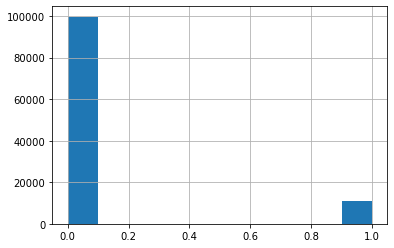

In [14]:
#visualising the enrollment of people on the Brasilian welfare program.
noshow_df.Scholarship.hist();

From the histogram above, there are almost 100,000 people who are not on the Brasilian welfare program, and a little over 10000 people on the program.

In [15]:
# getting the actual count of the people enrolled on the program.

noshow_df.groupby('Scholarship')['Scholarship'].count()

Scholarship
0    99666
1    10861
Name: Scholarship, dtype: int64

In [16]:
# finding how many people who are on scholarship actually go for the appointments.

noshow_df.groupby(['Scholarship','ShowNoshow'])['ShowNoshow'].count()

Scholarship  ShowNoshow
0            0             19741
             1             79925
1            0              2578
             1              8283
Name: ShowNoshow, dtype: int64

### Do patients need reminders to go for their appointments? if so, how effective is the use of sms as a means to remind patients of their appointments?


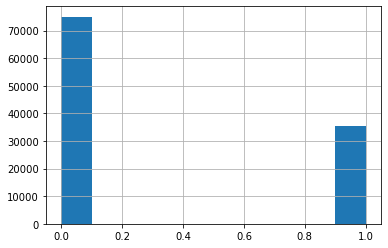

In [18]:
#visualising how many patients received sms reminders 

noshow_df.SMS_received.hist();

In [19]:
#getting the actual figures of the patients who received sms reminders.

noshow_df.groupby(['SMS_received'])['SMS_received'].count()

SMS_received
0    75045
1    35482
Name: SMS_received, dtype: int64

In [20]:
# finding the number of those who recieved sms and showed up for appointment.
noshow_df.groupby(['SMS_received', 'ShowNoshow'])['SMS_received'].count()

SMS_received  ShowNoshow
0             0             12535
              1             62510
1             0              9784
              1             25698
Name: SMS_received, dtype: int64

<a id='conclusions'></a>
## Conclusions



From the analysis, there are almost 10 times less people on the Brazilian Welfare program than there are. However of the more than 10,000 people on the welfare program, more than 4/5 of them actually schedule for appointments and show up. This could indicate that the people enrolled on the welfare program utilize it. 

Then, I analyzed the effectiveness of the using SMS to remind people of their scheduled appointments, out of 110,000 people, only 35000 get SMS reminders, of which more than 25,000 actually show up for their appointments. This may be a good indicator that using SMS is a good way to ensure that people show up for their appointments.

 In the analysis, I only looked at the relationship between showing up or not for appointments and whether the patients were on scholarship or not, and whether they got reminders or not. Please note that the conclusions herein are only an aggregation of the numbers and better analysis can be done by including more dependent variables like neighborhood, and chronic illnesses.